

<h1 align="center"><font size="5">Supervised Machine Learning: Regression </font></h1>


<h1 style="color:#1E90FF;text-align:center;font-size:36px;">Car Price Prediction </h1>



## Import the required libraries


In [1]:
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from scipy.stats import skew


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10 , 6]

## Importing the Dataset


In [2]:
data = pd.read_csv('Car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# About the Data


In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
data.shape

(8128, 13)

In [5]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#  Feature Description

### 1. **Name**
- **Type**: Categorical (String)
- **Description**: The name or model of the vehicle.
- **Example**: "Honda City", "Maruti Swift", "Toyota Corolla"

### 2. **Year**
- **Type**: Numerical (Integer)
- **Description**: The year the vehicle was manufactured or first registered.
- **Example**: 2015, 2018, 2020

### 3. **Selling Price**
- **Type**: Numerical (Integer)
- **Description**: The price at which the vehicle is being sold, usually in the local currency.
- **Example**: 400,000, 750,000, 1,200,000

### 4. **Kilometers Driven (km_driven)**
- **Type**: Numerical (Integer)
- **Description**: The total kilometers the vehicle has been driven.
- **Example**: 50,000 km, 80,000 km, 120,000 km

### 5. **Fuel**
- **Type**: Categorical (String)
- **Description**: The type of fuel the vehicle uses.
- **Example**: "Petrol", "Diesel", "CNG"

### 6. **Seller Type**
- **Type**: Categorical (String)
- **Description**: The type of seller (individual or dealer).
- **Example**: "Individual", "Dealer"

### 7. **Transmission**
- **Type**: Categorical (String)
- **Description**: The transmission type of the vehicle.
- **Example**: "Manual", "Automatic"

### 8. **Owner**
- **Type**: Categorical (String)
- **Description**: Number of previous owners of the vehicle.
- **Example**: "First Owner", "Second Owner", "Third Owner"

### 9. **Mileage**
- **Type**: Categorical (String)
- **Description**: The fuel efficiency of the vehicle.
- **Example**: "18.5 km/l", "15.2 km/l"

### 10. **Engine**
- **Type**: Categorical (String)
- **Description**: The engine capacity of the vehicle.
- **Example**: "1498 cc", "998 cc"

### 11. **Max Power**
- **Type**: Categorical (String)
- **Description**: The maximum power output of the vehicle.
- **Example**: "98.6 bhp", "73.9 bhp"

### 12. **Torque**
- **Type**: Categorical (String)
- **Description**: The rotational force produced by the engine.
- **Example**: "200 Nm", "150 Nm"

### 13. **Seats**
- **Type**: Numerical (Float)
- **Description**: The number of seats in the vehicle.
- **Example**: 5, 7


In [7]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Project Objective

The objective of this project is to develop a comprehensive data analysis pipeline for a vehicle sales dataset. The pipeline will encompass the following stages:

### 1. Data Cleaning
- **Description**: Addressing missing values, inconsistencies, and errors in the dataset to ensure data quality.
- **Tasks**:
  - Handling null values
  - Correcting errors
  - Standardizing data formats

### 2. Data Transformation
- **Description**: Converting data into appropriate formats and scales, including feature engineering and encoding categorical variables.
- **Tasks**:
  - Normalization
  - Encoding categorical variables
  - Creating new features as needed

### 3. Exploratory Data Analysis (EDA)
- **Description**: Investigating the dataset to uncover patterns, trends, and relationships through statistical summaries and visualizations.
- **Tasks**:
  - Generating descriptive statistics
  - Visualizing distributions
  - Identifying initial insights

### 4. Relation Analysis
- **Description**: Identifying and analyzing relationships between features to understand their interactions and impacts on the target variable.
- **Tasks**:
  - Correlation analysis
  - Scatter plots
  - Feature importance evaluation

### 5. Outlier Detection
- **Description**: Identifying and handling anomalies in the data that could affect model performance.
- **Tasks**:
  - Detecting outliers using statistical methods
  - Deciding on appropriate handling strategies

### 6. Data Splitting
- **Description**: Dividing the dataset into training and testing sets to evaluate model performance reliably.
- **Tasks**:
  - Splitting data into training, validation, and testing subsets

### 7. Model Training
- **Description**: Applying machine learning algorithms to train models on the training dataset.
- **Tasks**:
  - Selecting and training various machine learning models

### 8. Model Evaluation
- **Description**: Assessing model performance using appropriate metrics to ensure accuracy and robustness.
- **Tasks**:
  - Evaluating models using metrics such as accuracy, precision, recall, and F1-score

The ultimate goal is to derive actionable insights from the dataset and build predictive models to understand and forecast vehicle sales dynamics effectively.


# Data Cleaning 

##  Null Values

In [8]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
# cheking for null values
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

### Handling Null values 

In [10]:
# imputing the missing values in the mileage with mean of mileage 
data['mileage'] = data['mileage'].replace(r'[^\d.]+', '',regex=True).astype(float)
mileage_mean = data['mileage'].mean()
data['mileage'].fillna(mileage_mean,inplace=True)

# imputing the missing values in the engine with mean of engine
data['engine'] = data['engine'].replace(r'[^\d.]+','',regex = True).astype(float)
engine_mean = data['engine'].mean()
data['engine'].fillna(engine_mean,inplace=True)

# dropping the null values in torque
data.dropna(subset = ['torque'] , inplace = True)


# imputing the null values in seats  with mode od seats
seats_mode = data['seats'].mode()[0]
data['seats'] = data['seats'].fillna(seats_mode)


# coverting max power form object to float
data['max_power'] = data['max_power'].str.replace('bhp', '', regex=False).astype(float) # Remove ' bhp'


In [11]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 864.7+ KB


#  Outliers

In [13]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


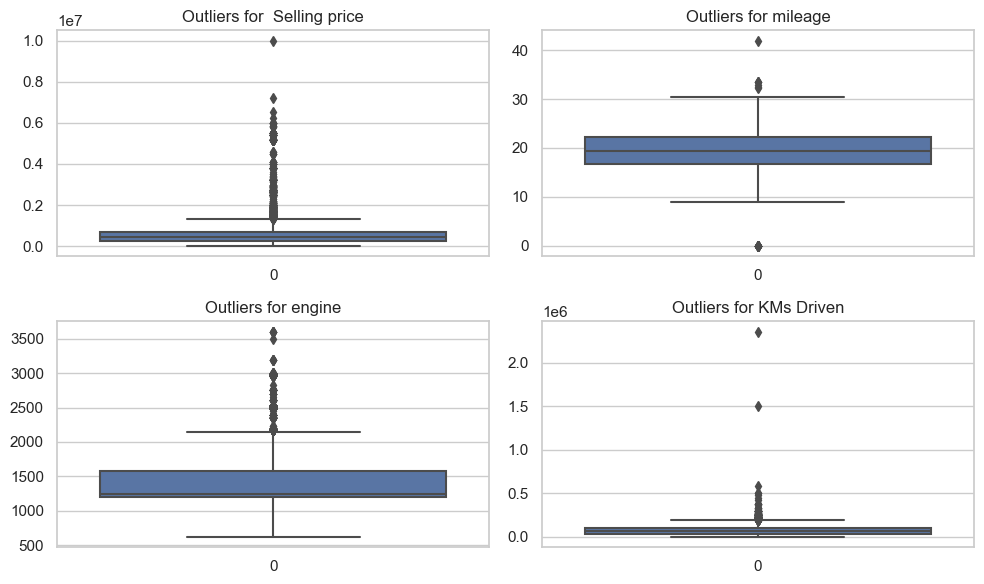

In [14]:
# cheking for selling price
sns.set_theme(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(data['selling_price'])
plt.title('Outliers for  Selling price')

#for mileage
plt.subplot(2,2,2)
sns.boxplot(data['mileage'])
plt.title('Outliers for mileage')

#for engine
plt.subplot(2,2,3)
sns.boxplot(data['engine'])
plt.title('Outliers for engine')

#for km driven
plt.subplot(2,2,4)
sns.boxplot(data['km_driven'])
plt.title('Outliers for KMs Driven')

plt.tight_layout()
plt.show()



## Handling Outliers

In [15]:
Q1 = data['selling_price'].quantile(0.25)
Q3 = data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
outliers = (data['selling_price'] < (Q1 - 3 * IQR)) | (data['selling_price'] > (Q3 + 3 * IQR))
len(outliers)

7906

**As we have found many outliers , removing all of them can be loss of data so we transform the outliers**

**Performing and comparing the transforming techniques and choosing the best technique which gives better result**

**Techniques performed :**
Log Transformation ,
Squareroot Transformation ,
Box-cox Transformation

In [16]:
# Apply log transformation
data['selling_price_log'] = np.log1p(data['selling_price'])  # log1p is used to handle log(0)

# Apply square root transformation
data['selling_price_sqrt'] = np.sqrt(data['selling_price'])

# Apply Box-Cox transformation
data['selling_price_boxcox'], _ = boxcox(data['selling_price'] + 1)  # Adding 1 to avoid log(0)


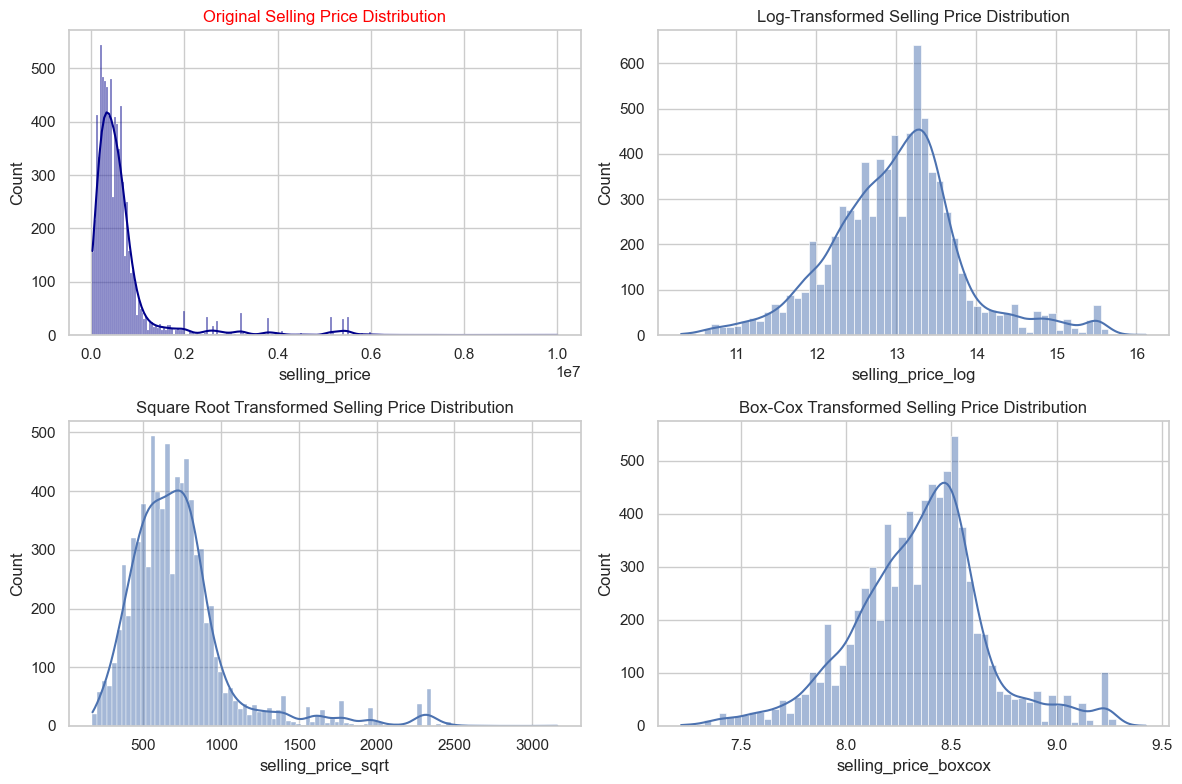

In [411]:
# Comparing through visually 
# Plot original and transformed distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['selling_price'], kde=True , color='darkblue')
plt.title('Original Selling Price Distribution',color='red')

plt.subplot(2, 2, 2)
sns.histplot(data['selling_price_log'], kde=True)
plt.title('Log-Transformed Selling Price Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['selling_price_sqrt'], kde=True)
plt.title('Square Root Transformed Selling Price Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['selling_price_boxcox'], kde=True)
plt.title('Box-Cox Transformed Selling Price Distribution')

plt.tight_layout()
plt.show()



# EDA(Exploratory data analysis)

In [17]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log,selling_price_sqrt,selling_price_boxcox
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,13.017005,670.820393,8.363021
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,12.821261,608.276253,8.287626
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,11.970357,397.492138,7.946912
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,12.323860,474.341649,8.091064
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,11.775297,360.555128,7.865745


## Plot Descriptions


### Selling Price vs Year

- **Objective**: Analyze how the year of manufacture affects the selling price.
- **Insight**: Identifies trends in vehicle pricing based on age (newer vs. older).

---

### Selling Price vs Km Driven

- **Objective**: Examine the impact of total kilometers driven on selling price.
- **Insight**: Shows if higher mileage results in lower selling prices.

---

### Selling Price vs Fuel

- **Objective**: Compare selling prices across different fuel types (e.g., petrol, diesel).
- **Insight**: Determines if certain fuel types are associated with higher or lower prices.

---

### Selling Price vs Transmission

- **Objective**: Analyze the effect of transmission type (manual vs. automatic) on selling price.
- **Insight**: Shows if vehicles with automatic transmissions are priced differently from manual ones.

---

### Selling Price vs Owner

- **Objective**: Investigate how the number of previous owners affects selling price.
- **Insight**: Reveals if more previous owners lead to lower selling prices.

---

### Selling Price vs Mileage

- **Objective**: Assess the relationship between mileage (fuel efficiency) and selling price.
- **Insight**: Indicates if vehicles with better mileage are sold at higher prices.

---

### Selling Price vs Max Power

- **Objective**: Examine how maximum power output influences selling price.
- **Insight**: Determines if higher engine power is associated with higher prices.

---


# Price vs Year 

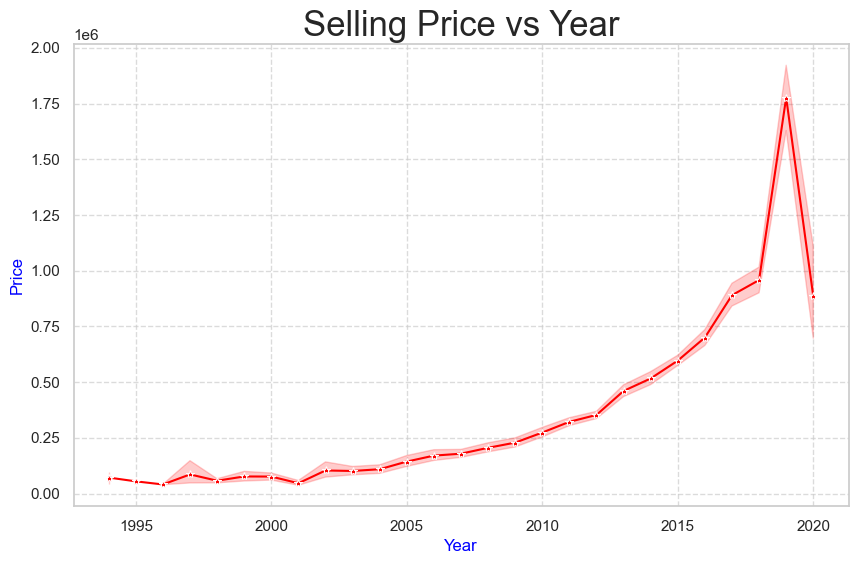

In [18]:
# plotting price vs year 
sns.lineplot(x='year',y='selling_price',data=data,marker='*',color='red')
plt.title('Selling Price vs Year',fontsize=25)
plt.xlabel('Year',color='blue')
plt.ylabel('Price',color='blue')
plt.grid(True, linestyle='--', linewidth=1, alpha=0.7)
plt.show()

# KM's vs Selling Price

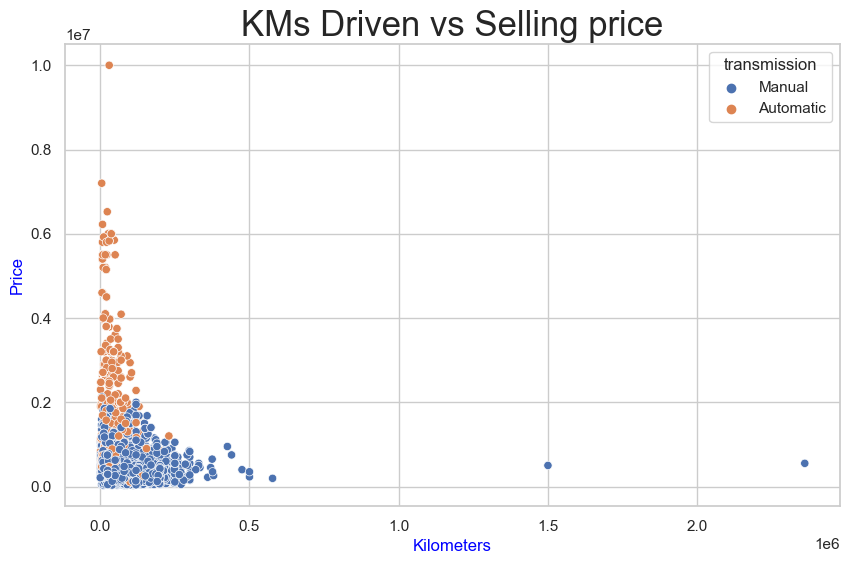

In [19]:
# plotting Km's driven vs price
sns.scatterplot(x='km_driven',y='selling_price',data=data,hue='transmission')
plt.title('KMs Driven vs Selling price' , fontsize=25)
plt.xlabel('Kilometers',color='blue')
plt.ylabel('Price',color='blue')
plt.show()

# Mileage vs Selling Price

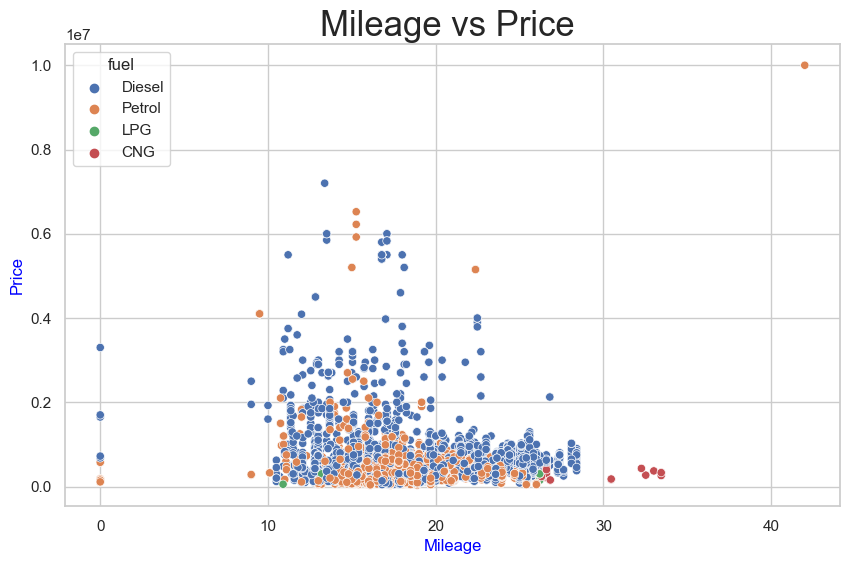

In [20]:
# plotting mileage vs price
sns.scatterplot(x='mileage',y='selling_price',color='darkblue',data=data , hue='fuel')
plt.title('Mileage vs Price ',fontsize=25)
plt.xlabel('Mileage',color='blue')
plt.ylabel('Price',color='blue')
plt.grid(True)
plt.show()

# Max Power vs Selling Price

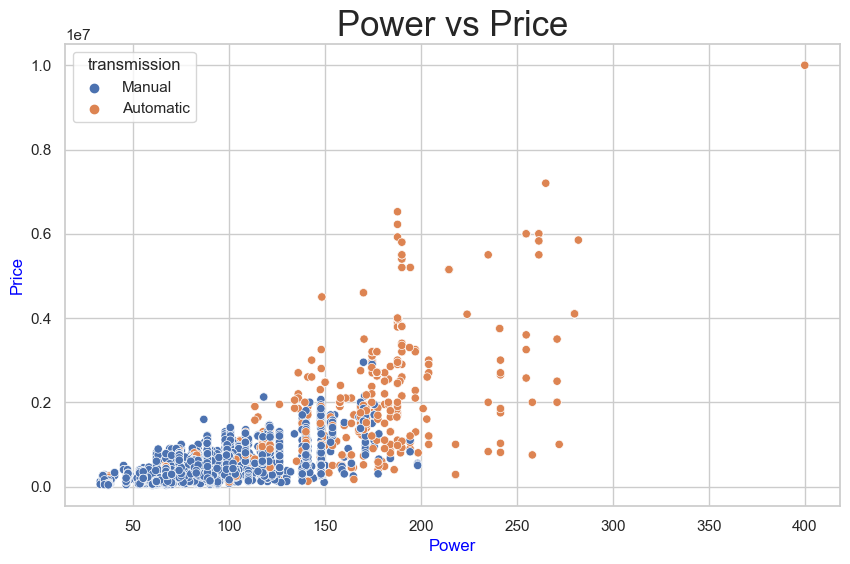

In [21]:
# plotting power vs price
sns.scatterplot(x='max_power',y='selling_price',data=data,hue="transmission")
plt.title('Power vs Price',fontsize=25)
plt.xlabel('Power',color='blue')
plt.ylabel('Price',color='blue')
plt.show()

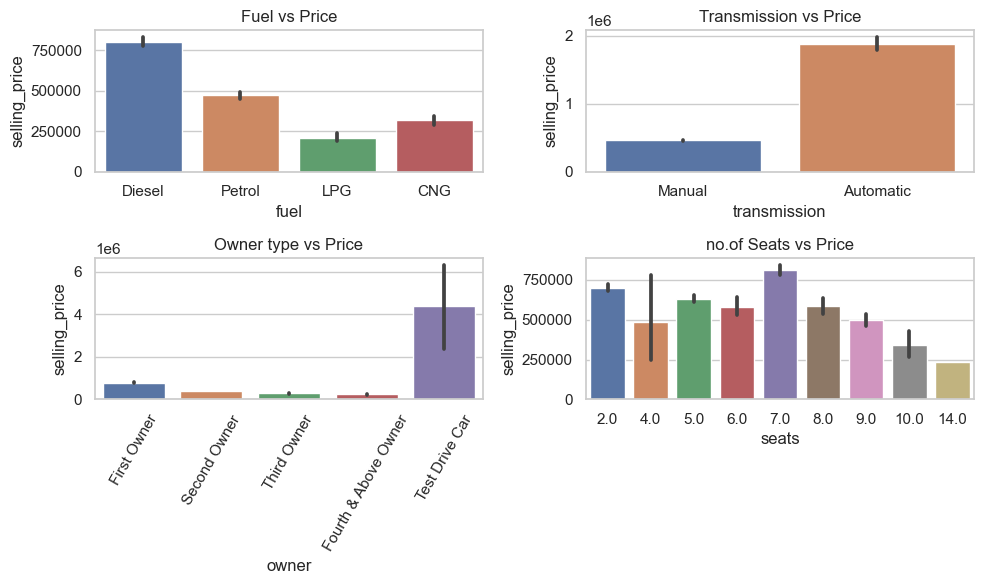

In [22]:
# fuel vs selling price
plt.subplot(2,2,1)
sns.barplot(x='fuel',y='selling_price',data=data)
plt.title('Fuel vs Price')

# transmission vs selling price
plt.subplot(2,2,2)
sns.barplot(x='transmission',y='selling_price',data=data)
plt.title('Transmission vs Price')

# owner vs sellling price
plt.subplot(2,2,3)
sns.barplot(x='owner',y='selling_price',data=data)
plt.title('Owner type vs Price')
plt.xticks(rotation=60)

# seats vs selling price
plt.subplot(2,2,4)
sns.barplot(x='seats',y='selling_price',data=data)
plt.title('no.of Seats vs Price')

plt.tight_layout()
plt.show()



## One-Hot Encoding

**By using one-hot encoding we convert our categorical features into numeric**

In [23]:
# applying One-Hot encoding
data_encoded = pd.get_dummies(data,columns=['fuel','transmission','owner'])
data_encoded .shape

(7906, 24)

In [24]:
data_numeric = data_encoded.select_dtypes(include=['number'])
corr = data_numeric.corr()
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats,selling_price_log,selling_price_sqrt,selling_price_boxcox
year,1.000000,0.412302,-0.428548,0.328544,0.018263,0.226598,-0.007923,0.702640,0.565567,0.716224
selling_price,0.412302,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617,0.797613,0.953878,0.767724
km_driven,-0.428548,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259,-0.248135,-0.248749,-0.244851
mileage,0.328544,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700,-0.034947,-0.102484,-0.023025
engine,0.018263,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103,0.517779,0.517987,0.511243
max_power,0.226598,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999,0.731599,0.787773,0.715264
seats,-0.007923,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000,0.188363,0.116963,0.196124
selling_price_log,0.702640,0.797613,-0.248135,-0.034947,0.517779,0.731599,0.188363,1.000000,0.937614,0.998620
selling_price_sqrt,0.565567,0.953878,-0.248749,-0.102484,0.517987,0.787773,0.116963,0.937614,1.000000,0.918629
selling_price_boxcox,0.716224,0.767724,-0.244851,-0.023025,0.511243,0.715264,0.196124,0.998620,0.918629,1.000000


In [25]:
data_encoded.head()

,name,year,selling_price,km_driven,seller_type,mileage,engine,max_power,torque,seats,...,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,...,True,False,False,False,True,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,...,True,False,False,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,...,False,False,True,False,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,...,True,False,False,False,True,True,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,...,False,False,True,False,True,True,False,False,False,False


Dropping the Unnecessary columns and conerting the columns with BOOL to INt , so that we can train our model on numerical data 

In [26]:
#Dropping columns
data_encoded.drop(columns=['name','seats','engine','torque','seller_type'],inplace=True)
#Coverting from bool to int
data_encoded = data_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [27]:
Data = data_encoded
Data.head()

,year,selling_price,km_driven,mileage,max_power,selling_price_log,selling_price_sqrt,selling_price_boxcox,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,74.00,13.017005,670.820393,8.363021,0,1,0,0,0,1,1,0,0,0,0
1,2014,370000,120000,21.14,103.52,12.821261,608.276253,8.287626,0,1,0,0,0,1,0,0,1,0,0
2,2006,158000,140000,17.70,78.00,11.970357,397.492138,7.946912,0,0,0,1,0,1,0,0,0,0,1
3,2010,225000,127000,23.00,90.00,12.323860,474.341649,8.091064,0,1,0,0,0,1,1,0,0,0,0
4,2007,130000,120000,16.10,88.20,11.775297,360.555128,7.865745,0,0,0,1,0,1,1,0,0,0,0


Here we Dropped The unnecessary columns and converted all columns into numeric so that our data is ready to get trained

In [32]:
# Calculate skewness
skewness = Data.apply(lambda x: skew(x.dropna()))

# Identify highly skewed features
highly_skewed = skewness[skewness > 1].index
print("Highly skewed features:", highly_skewed)


Highly skewed features: Index(['fuel_CNG', 'fuel_LPG', 'transmission_Automatic',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


In [33]:
# Applying log transformation
for feature in highly_skewed:
    Data[feature] = np.log1p(Data[feature])  

# Model Training

In [37]:
# # splitting the data 
x = Data.drop(columns = ['selling_price'],axis = 1)
y = Data['selling_price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### From the above transformations , Log transformation gives us best Results

**We apply this to all the Highly skewed Features**

## Scaling the features

In [38]:
# scaling the Features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Simple Linear Regression

In [42]:
# training on the model with scaled data 
lr = LinearRegression()
# training the model
lr.fit(x_train_scaled,y_train)

# making Predictions 
y_scaled_pred = lr.predict(x_test_scaled)

In [43]:
mse_scaled_lr = mean_squared_error(y_scaled_pred,y_test)

In [44]:
mse_scaled_lr

9.03549911669073e-30

# Polynomial Regression 

In [70]:
# creating polynomial features 
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)

# Training the polynomial regression model 
poly_model = LinearRegression()
poly_model.fit(x_poly_train,y_train)

LinearRegression()

In [71]:
# making predictions 
y_poly_pred = poly_model.predict(x_poly_test)

y_poly_pred

array([13.56576761, 13.29631837, 13.10216271, ..., 13.0280549 ,
       13.07107219, 13.18063417])

In [72]:
mse_poly = mean_squared_error(y_poly_pred,y_test)

mse_poly

7.641796094672932e-07

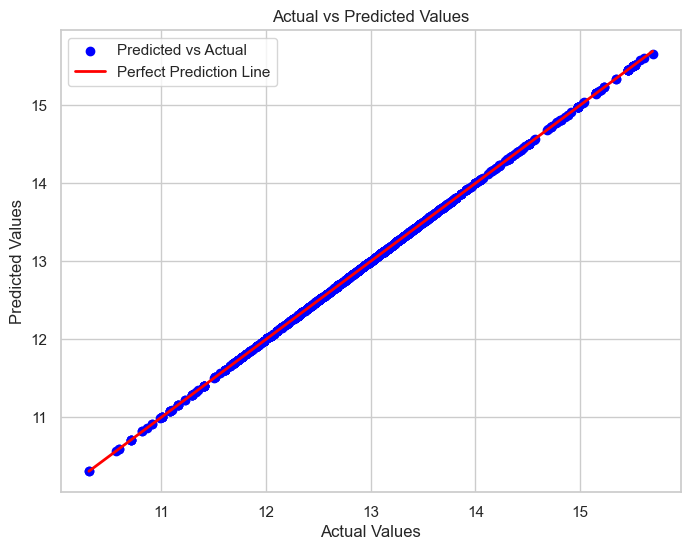

In [73]:
plt.figure(figsize=(8, 6))

# Scatter plot of Actual vs Predicted
plt.scatter(y_test, y_poly_pred, color='blue', label='Predicted vs Actual')

# Plot a diagonal line representing perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


# Regularisation Model

In [54]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled,y_train)

Ridge()

In [55]:
ridge_pred = ridge_model.predict(x_test_scaled)

In [56]:
ridge_mse = mean_squared_error(ridge_pred,y_test)
ridge_mse

1.7850139635226079e-06

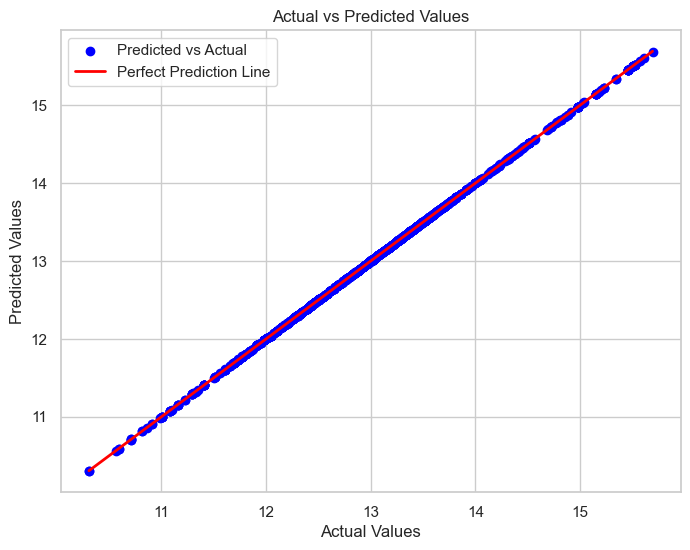

In [57]:
plt.figure(figsize=(8, 6))

# Scatter plot of Actual vs Predicted
plt.scatter(y_test, ridge_pred, color='blue', label='Predicted vs Actual')


# Plot a diagonal line representing perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [58]:
# Baseline model (predicting the mean)
baseline_pred = y_test.mean()
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
print(f"Baseline Model MSE: {baseline_mse}")


Baseline Model MSE: 0.6793279383906901


In [59]:

r2 = r2_score(y_test, y_scaled_pred)
print(f"R-squared: {r2}")


R-squared: 1.0


In [64]:

x_scaled = scaler.fit_transform(x)
scores = cross_val_score(ridge_model,x_scaled,y,cv=5,scoring='neg_mean_squared_error')
mse_cv = -scores.mean()
print(f"Cross-Validated MSE: {mse_cv}")

Cross-Validated MSE: 1.732897867097487e-06


In [65]:
print(f"MSE for Simple Linear Model :{mse_scaled_lr}")
print(f"MSE for Polynomial Feature Model :{mse_poly}")
print(f"MSE for Ridge REgression :{ridge_mse}")
print(f"R-SQuard , r2 score :{r2}")
print(f"Cross alidation score :{mse_cv}")
print(f"BaseLine Model MSe :{baseline_mse}")

MSE for Simple Linear Model :9.03549911669073e-30
MSE for Polynomial Feature Model :7.641796094672932e-07
MSE for Ridge REgression :1.7850139635226079e-06
R-SQuard , r2 score :1.0
Cross alidation score :1.732897867097487e-06
BaseLine Model MSe :0.6793279383906901


# 4. Insights and Findings




---

### 1. Data Cleaning and Transformation Insights

- **Outliers**: 
  - There were a significant number of outliers in features like `km_driven`, `selling_price`, `mileage`, and `max_power`. 
  - These outliers represented extreme or unusual cases, which had a noticeable impact on the model's performance.
  
- **Skewed Distribution**: 
  - The `selling_price` distribution was left-skewed, indicating that most vehicles were sold at lower prices, with fewer being sold at higher prices.
  - Skewed target variables often impact model accuracy negatively.

- **Log Transformation**: 
  - Applying a log transformation to the target variable helped normalize the distribution, which typically leads to more stable and accurate models.

---

### 2. Modeling Findings

#### Baseline Model (Simple Linear Regression)
- **MSE: 0.6793**: 
  - This baseline model serves as a benchmark to compare the performance of more advanced models. The MSE of 0.6793 indicates a reasonable starting point.

#### Polynomial Feature Model
- **MSE: 7.64e-07**: 
  - Adding polynomial terms captured non-linear relationships. However, the extremely small MSE suggests that the model is overfitting by capturing noise rather than generalizable patterns.

#### Ridge Regression
- **MSE: 1.78e-06**: 
  - Regularization using Ridge Regression helped control the overfitting observed in the polynomial model. However, the model may still be slightly overfitting due to the small MSE.

#### Cross-Validation
- **Cross-validated MSE: 1.73e-06**: 
  - Cross-validation helped verify the consistency of the model’s performance, though the small MSE indicates that overfitting is still an issue across the validation folds.

#### Final R-squared (R2 score)
- **R-squared: 1.0**: 
  - The perfect R-squared value indicates overfitting in the training data. While the model explains all the variance in the training set, it might not generalize well to unseen data.

---

### 3. Feature Relationships

- **Mileage and Selling Price**: 
  - Vehicles with higher mileage generally had lower selling prices, showing depreciation with increased usage.

- **Year and Selling Price**: 
  - Newer vehicles had higher selling prices, which is intuitive. However, outliers like classic cars (older, but higher-priced) may distort this relationship.

- **Engine and Max Power**: 
  - Vehicles with larger engines and higher max power tended to have higher selling prices, particularly for performance or luxury vehicles.

---

### 4. Regularization Effects

- **Regularization Impact**: 
  - Ridge regression introduced regularization, which helped control overfitting, but the effect was not strong enough to prevent the near-zero MSE. More tuning of the regularization parameter (`alpha`) could help improve generalization.

---

### 5. Overfitting and Model Generalization

- **Overfitting Issue**: 
  - The very low MSE values (near zero) in both the polynomial and Ridge models, coupled with an R-squared of 1.0, strongly suggest that the models are overfitting. 
  - This overfitting indicates the need to simplify the model or apply stronger regularization techniques to improve generalization.

---


# 5. Next Steps


## Next Steps / Recommendations

1. **Tune Regularization**: 
   - Increase the `alpha` value in Ridge regression to further reduce overfitting.
  
2. **Cross-Validation with More Folds**: 
   - Use cross-validation with more folds (e.g., `cv=10`) to better estimate the model’s generalization performance.

3. **Refine Feature Engineering**: 
   - Explore creating interaction terms between features like `engine`, `max_power`, and `fuel` to better capture complex relationships.

4. **Outliers**: 
   - Revisit the outliers and consider removing them or creating specialized models for different types of vehicles (e.g., economy vs. luxury).

5. **Model Selection**: 
   - Experiment with additional regularization techniques such as Lasso or ElasticNet, or use tree-based models like Random Forest to handle complex relationships without overfitting.
